# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


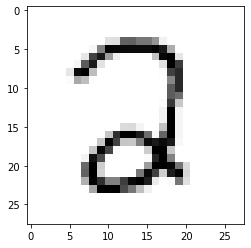

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2455
Training Accuracy: 0.6813, Testing Accuracy: 0.6825



Epoch 10, Loss 0.0817
Training Accuracy: 0.9193, Testing Accuracy: 0.9335



Epoch 20, Loss 0.0523
Training Accuracy: 0.9441, Testing Accuracy: 0.9582



Epoch 30, Loss 0.0417
Training Accuracy: 0.9547, Testing Accuracy: 0.9637



Epoch 40, Loss 0.0364
Training Accuracy: 0.9589, Testing Accuracy: 0.9657



Epoch 50, Loss 0.0332
Training Accuracy: 0.9621, Testing Accuracy: 0.9698



Epoch 60, Loss 0.0309
Training Accuracy: 0.9649, Testing Accuracy: 0.9682



Epoch 70, Loss 0.0292
Training Accuracy: 0.9669, Testing Accuracy: 0.9682



Epoch 80, Loss 0.0278
Training Accuracy: 0.9683, Testing Accuracy: 0.9672



Epoch 90, Loss 0.0267
Training Accuracy: 0.9693, Testing Accuracy: 0.9672



Epoch 100, Loss 0.0257
Training Accuracy: 0.9699, Testing Accuracy: 0.9688



Epoch 110, Loss 0.0249
Training Accuracy: 0.9710, Testing Accuracy: 0.9698



Epoch 120, Loss 0.0241
Training Accuracy: 0.9720, Testing Accuracy: 0.9708



Epoch 130, Loss 0.0234
Training Accuracy: 0.9730, Testing Accuracy: 0.9718



Epoch 140, Loss 0.0228
Training Accuracy: 0.9737, Testing Accuracy: 0.9718



Epoch 150, Loss 0.0223
Training Accuracy: 0.9747, Testing Accuracy: 0.9723



Epoch 160, Loss 0.0217
Training Accuracy: 0.9755, Testing Accuracy: 0.9723



Epoch 170, Loss 0.0212
Training Accuracy: 0.9762, Testing Accuracy: 0.9723



Epoch 180, Loss 0.0207
Training Accuracy: 0.9767, Testing Accuracy: 0.9723



Epoch 190, Loss 0.0203
Training Accuracy: 0.9774, Testing Accuracy: 0.9728



Epoch 200, Loss 0.0198
Training Accuracy: 0.9777, Testing Accuracy: 0.9738



Epoch 210, Loss 0.0194
Training Accuracy: 0.9786, Testing Accuracy: 0.9743



Epoch 220, Loss 0.019
Training Accuracy: 0.9793, Testing Accuracy: 0.9748



Epoch 230, Loss 0.0186
Training Accuracy: 0.9801, Testing Accuracy: 0.9753



Epoch 240, Loss 0.0182
Training Accuracy: 0.9806, Testing Accuracy: 0.9753



0.0004791741269504733

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2533
Training Accuracy: 0.6507, Testing Accuracy: 0.6396



Epoch 10, Loss 0.1019
Training Accuracy: 0.9180, Testing Accuracy: 0.9284



Epoch 20, Loss 0.0783
Training Accuracy: 0.9320, Testing Accuracy: 0.9430



Epoch 30, Loss 0.0676
Training Accuracy: 0.9382, Testing Accuracy: 0.9476



Epoch 40, Loss 0.0612
Training Accuracy: 0.9424, Testing Accuracy: 0.9536



Epoch 50, Loss 0.0568
Training Accuracy: 0.9455, Testing Accuracy: 0.9551



Epoch 60, Loss 0.0536
Training Accuracy: 0.9481, Testing Accuracy: 0.9577



Epoch 70, Loss 0.0511
Training Accuracy: 0.9500, Testing Accuracy: 0.9592



Epoch 80, Loss 0.0491
Training Accuracy: 0.9513, Testing Accuracy: 0.9617



Epoch 90, Loss 0.0474
Training Accuracy: 0.9528, Testing Accuracy: 0.9632



Epoch 100, Loss 0.046
Training Accuracy: 0.9538, Testing Accuracy: 0.9637



Epoch 110, Loss 0.0448
Training Accuracy: 0.9545, Testing Accuracy: 0.9637



Epoch 120, Loss 0.0438
Training Accuracy: 0.9559, Testing Accuracy: 0.9627



Epoch 130, Loss 0.0428
Training Accuracy: 0.9570, Testing Accuracy: 0.9637



Epoch 140, Loss 0.042
Training Accuracy: 0.9579, Testing Accuracy: 0.9642



Epoch 150, Loss 0.0413
Training Accuracy: 0.9589, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0406
Training Accuracy: 0.9594, Testing Accuracy: 0.9657



Epoch 170, Loss 0.04
Training Accuracy: 0.9597, Testing Accuracy: 0.9667



Epoch 180, Loss 0.0394
Training Accuracy: 0.9599, Testing Accuracy: 0.9672



Epoch 190, Loss 0.0389
Training Accuracy: 0.9604, Testing Accuracy: 0.9672



Epoch 200, Loss 0.0385
Training Accuracy: 0.9609, Testing Accuracy: 0.9677



Epoch 210, Loss 0.038
Training Accuracy: 0.9609, Testing Accuracy: 0.9682



Epoch 220, Loss 0.0376
Training Accuracy: 0.9609, Testing Accuracy: 0.9682



Epoch 230, Loss 0.0372
Training Accuracy: 0.9615, Testing Accuracy: 0.9682



Epoch 240, Loss 0.0369
Training Accuracy: 0.9617, Testing Accuracy: 0.9682



0.07863255610736702

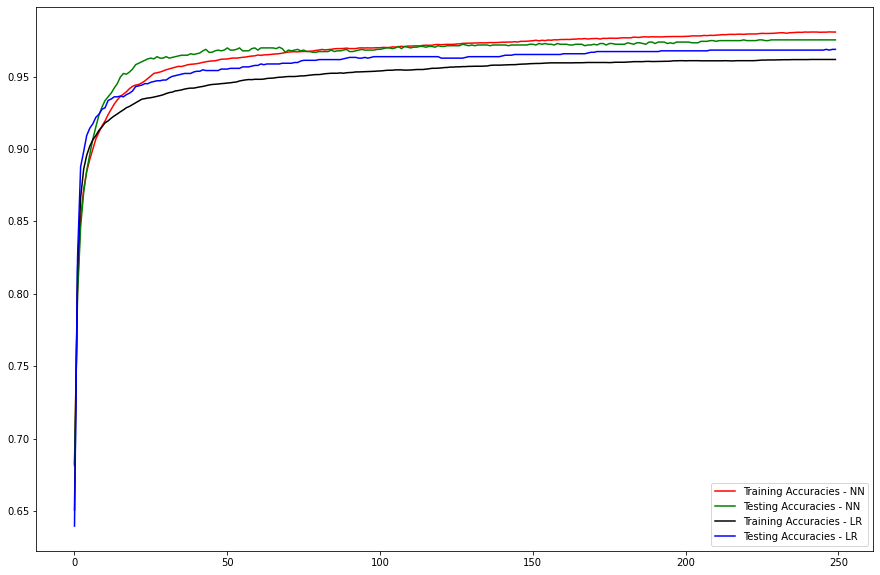

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

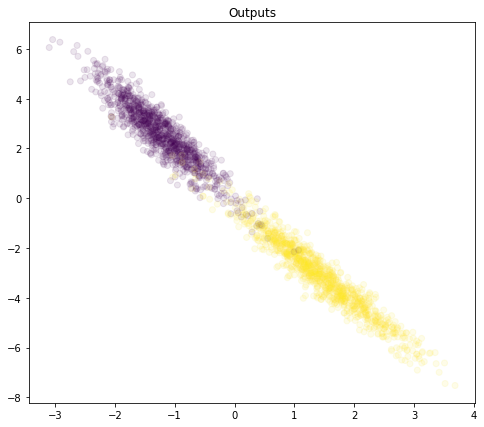

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

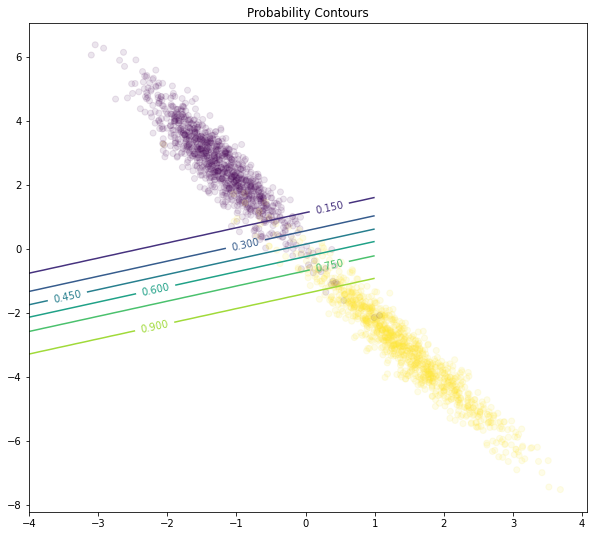

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );